In [104]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from nbodykit.lab import cosmology

import scipy

In [22]:
def xi(r):
    #return (r-6)**2 + 1 
    return np.sin(r)

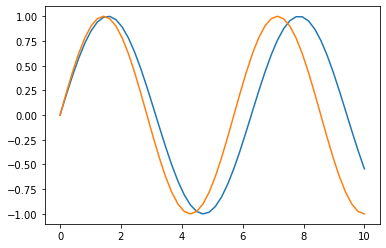

In [23]:
alpha = 1.1
r = np.linspace(0, 10)
plt.plot(r, xi(r))
plt.plot(r, xi(alpha*r))

In [24]:
def partial_derivative(f1, f2, dv):
    df = f2-f1
    deriv = df/dv
    return deriv

In [35]:
def derivative(r, f, preserve_dims=True):
    df = f[1:]-f[:-1]
    dr = r[1:]-r[:-1]
    deriv = df/dr
    # how to do??
    if preserve_dims:
        deriv = np.append(deriv, deriv[-1])
        return r, deriv
    else:
        ravg = 0.5*(r[1:]+r[:-1])
        return ravg, deriv

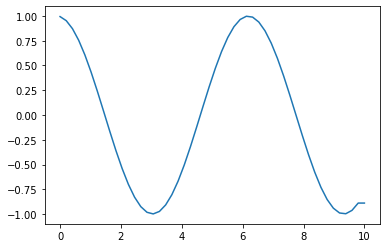

In [42]:
r, dxi_dr = derivative(r, xi(r))
plt.plot(r, dxi_dr)

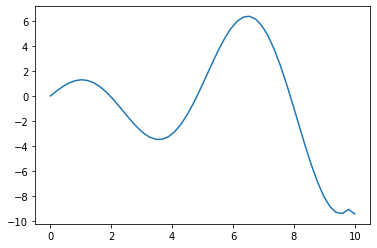

In [44]:
xi_model = xi(r)
fit = xi_model + r*dxi_dr
plt.plot(r, fit)

d partial_derivative(xi(r), xi(alpha*r), alpha)
d_dalpha xi(alpha*r) =  r d/dalpha[ xi(alpha * r) ]

In [38]:
Bsq = 1
C = 1
a1 = 1
a2 = 1
a3 = 1

In [39]:
r = np.linspace(0, 10)
xi_model = xi(r)
ravg, dxi_dr = derivative(r, xi_model)

In [40]:
xi_fit = Bsq * xi_model + C * r*dxi_dr + a1/r**2 + a2/r + a3

/Users/ksf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


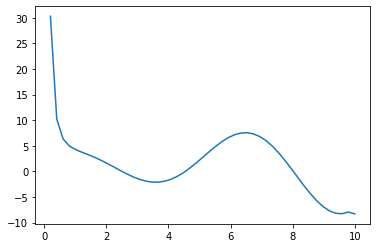

In [41]:
plt.plot(r, xi_fit)

In [ ]:
f = (r)^2
f(ar) = (ar)^2
df/da = 2*a r^2

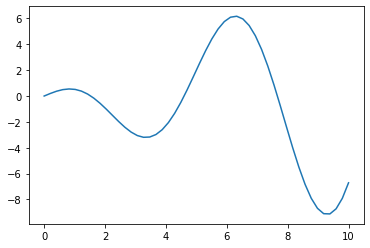

In [60]:
alpha = 1.05
dalpha = alpha-1
partial = partial_derivative(xi(r), xi(alpha*r), dalpha)
plt.plot(r, partial)

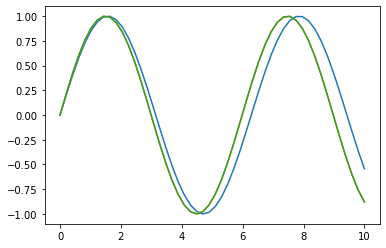

In [61]:
plt.plot(r, xi(r))
plt.plot(r, xi(r)+dalpha*partial)
plt.plot(r, xi(alpha*r))

In [ ]:
dalpha = alpha*partial

In [55]:
cosmo_model = cosmology.Planck15
redshift = 0
smin = 40
smax = 150
s = np.linspace(smin, smax, 300)

In [56]:
Plin = cosmology.LinearPower(cosmo_model, redshift, transfer='EisensteinHu')
CF = cosmology.correlation.CorrelationFunction(Plin)
xi_model = CF(s)

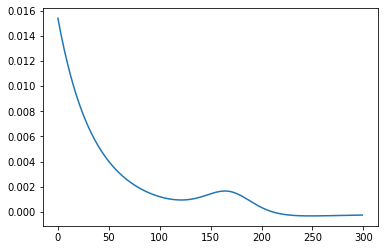

In [57]:
plt.plot(xi_model)

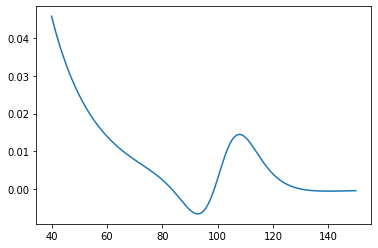

In [154]:
alpha = 1.03
dalpha = 1-alpha
dxi_dalpha = partial_derivative(CF(s), CF(alpha*s), dalpha)
plt.plot(s, dxi_dalpha)

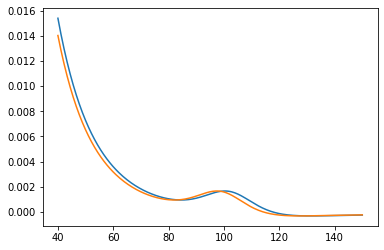

In [155]:
plt.plot(s, xi_model)
plt.plot(s, xi_model + dalpha*dxi_dalpha)

In [79]:
b1 = xi_model
b2 = dalpha*dxi_dalpha
b3 = 0.01 * 1.0/s**2
b4 = 0.01 * 1.0/s
b5 = np.ones(len(s))/1000.
bases = [b1,b2,b3,b4,b5]

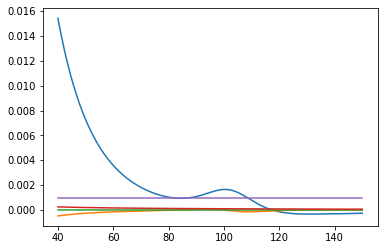

In [80]:
for b in bases:
    plt.plot(s, b)

# Fitting BAO

Create model with certain alpha, sample at finite s, and add gaussian noise

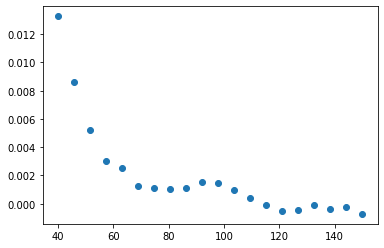

In [189]:
alpha_samp = 1.05
s_samp = np.linspace(40, 150, 20)
xi_samp = CF(s_samp * alpha_samp)
noise = np.random.normal(0, 0.0002, size=len(xi_samp))
xi_samp += noise
plt.plot(s_samp, xi_samp, marker='o', ls='None')

Set up bases and model

In [190]:
def bases(s, p1=1, p2=1, p3=1):
    
    b1 = p1 * 1.0/s**2
    b2 = p2 * 1.0/s
    b3 = p3 * np.ones(len(s))
    
    b4 = CF(s)
    
    alpha = 1.01
    dalpha = 1-alpha
    dxi_dalpha = partial_derivative(CF(s), CF(alpha*s), dalpha)
    b5 = dalpha*dxi_dalpha
    
    return b1,b2,b3,b4,b5

In [191]:
def xi_fit(s, a1, a2, a3, Bsq, C):
    b1,b2,b3,b4,b5 = bases(s)
    return a1*b1 + a2*b2 + a3*b3 + Bsq*b4 + C*b5

Perform fit to model. The value for C is related to the fit for alpha: alpha = 1+C*dalpha, where dalpha has been set to 0.01.

In [192]:
val_names = ['a1', 'a2', 'a3', 'Bsq', 'C']
guess = np.ones(5)
popt, pcov = scipy.optimize.curve_fit(xi_fit, s_samp, xi_samp, guess)

for i in range(len(popt)):
    print('{}: {:.4f}'.format(val_names[i], popt[i]))

a1: -2.6418
a2: 0.0390
a3: -0.0002
Bsq: 1.0311
C: 3.6883


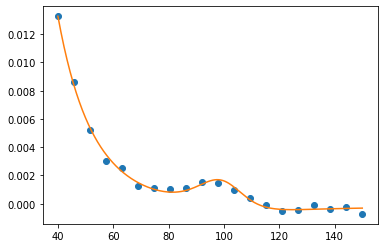

In [193]:
plt.plot(s_samp, xi_samp, marker='o', ls='None')
plt.plot(s, xi_fit(s, *popt))

Check out the basis functions, multiplied by the fit value, so the sum equals the final fit:

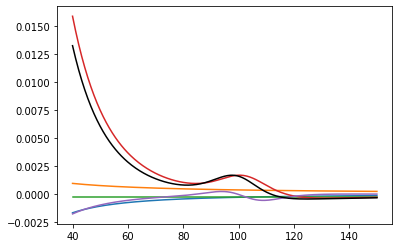

In [194]:
bs = bases(s)
total = np.zeros(len(s))
for i in range(len(bs)):
    total += popt[i]*bs[i]
    plt.plot(s, popt[i]*bs[i])
plt.plot(s, total, color='k')

It worked! Reducing the noise gives a better fit. Can also change the value of alpha and see the results.